In [8]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

df = 0.9
nt = 100
ns = 3
nc = 5
ng = 50
nd = 100
n_arms = ns*nc
ut = (1, 0)
th = 0.3
fr = 0.1

file1 = f'/Users/nima/Desktop/Others/PostDoc/RiskAware_Journal/Updated/FINAL-FINAL/planning-infinite-June25/df{df}_nt{nt}_ns{ns}_ng{ng}_nd{nd}_nc{nc}_ttstructured_ut{ut}_th{th}_fr{fr}_Neutral.joblib'
file2 = f'/Users/nima/Desktop/Others/PostDoc/RiskAware_Journal/Updated/FINAL-FINAL/planning-infinite-June25/df{df}_nt{nt}_ns{ns}_ng{ng}_nd{nd}_nc{nc}_ttstructured_ut{ut}_th{th}_fr{fr}_RiskAware.joblib'

# Load data from joblib files
data1 = joblib.load(file1)
data2 = joblib.load(file2)

# Extract `totalrewards` from the loaded data
totalrewards1 = data1[0]
totalrewards2 = data2[0]


arm = 0
percentage above threshold (Neutral) = 100.0
percentage above threshold (Risk-Aware) = 100.0


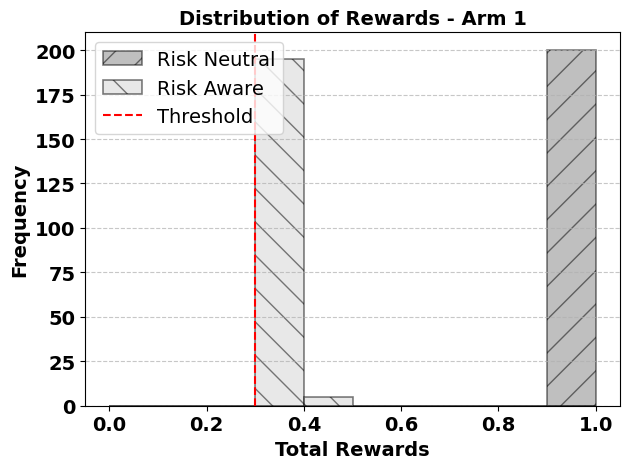

arm = 1
percentage above threshold (Neutral) = 0.0
percentage above threshold (Risk-Aware) = 100.0


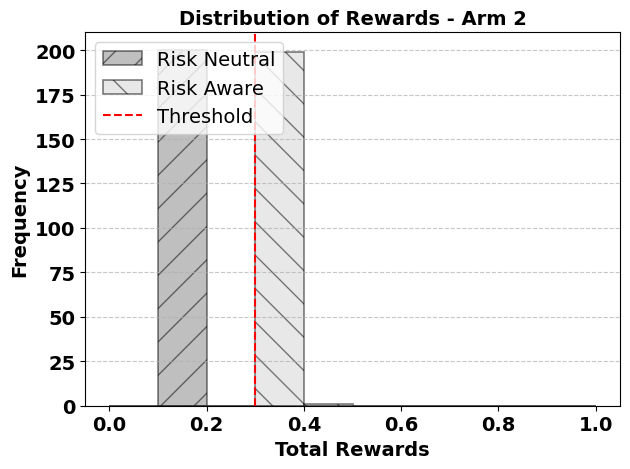

arm = 2
percentage above threshold (Neutral) = 100.0
percentage above threshold (Risk-Aware) = 81.5


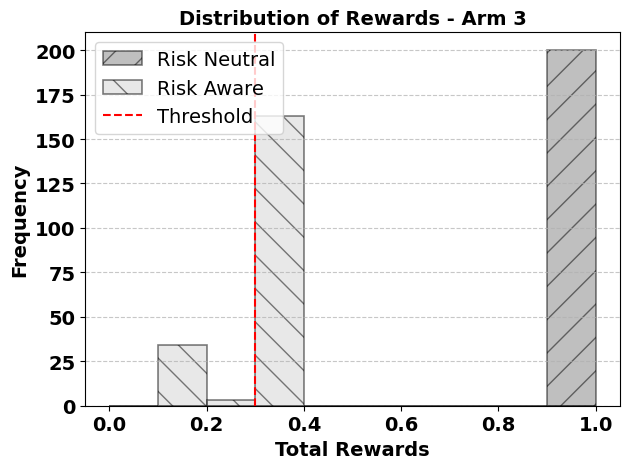

arm = 3
percentage above threshold (Neutral) = 1.0
percentage above threshold (Risk-Aware) = 71.0


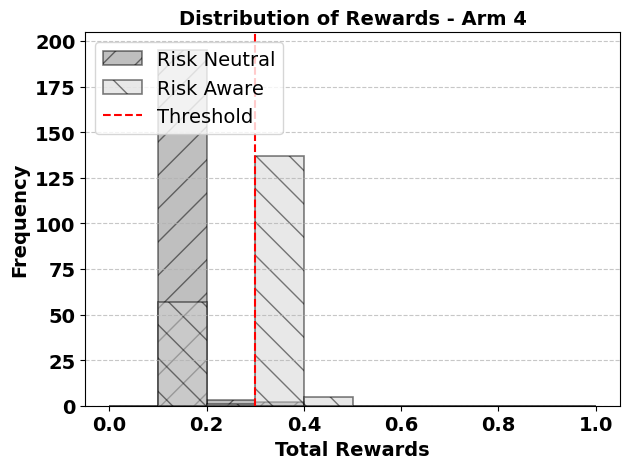

arm = 4
percentage above threshold (Neutral) = 0.0
percentage above threshold (Risk-Aware) = 100.0


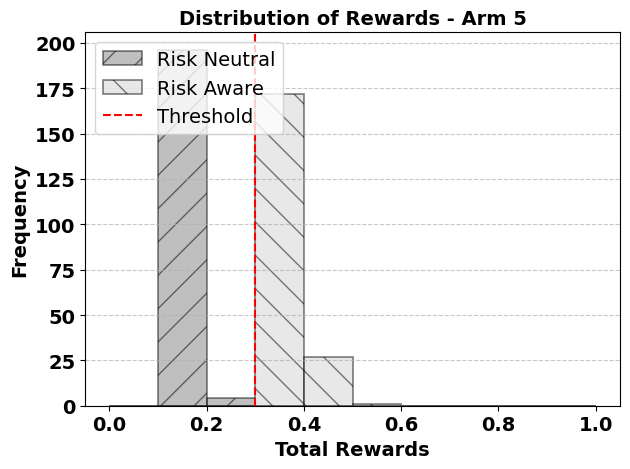

arm = 5
percentage above threshold (Neutral) = 0.0
percentage above threshold (Risk-Aware) = 45.5


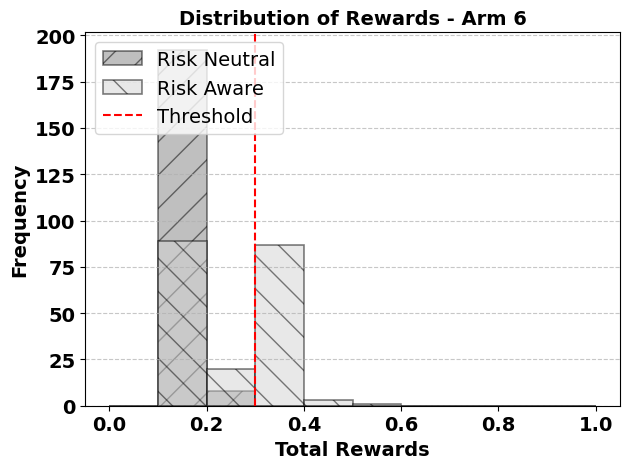

arm = 6
percentage above threshold (Neutral) = 0.5
percentage above threshold (Risk-Aware) = 91.5


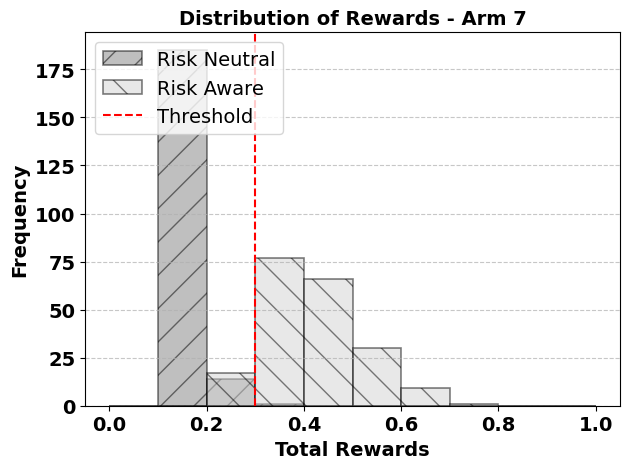

arm = 7
percentage above threshold (Neutral) = 0.5
percentage above threshold (Risk-Aware) = 14.5


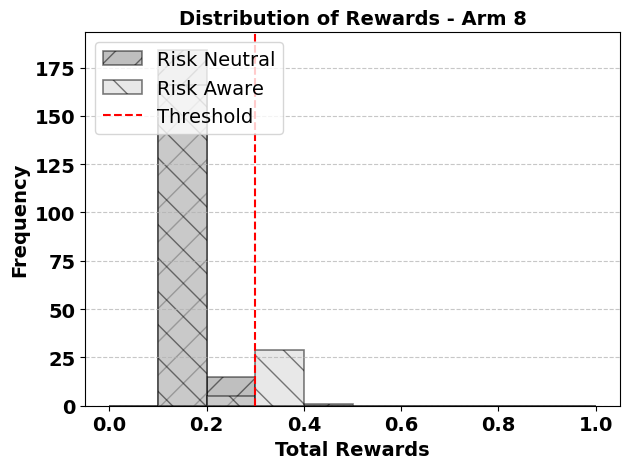

arm = 8
percentage above threshold (Neutral) = 1.5
percentage above threshold (Risk-Aware) = 4.5


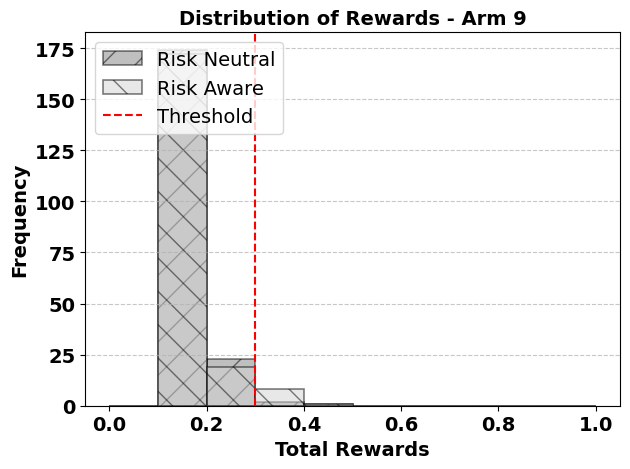

arm = 9
percentage above threshold (Neutral) = 4.0
percentage above threshold (Risk-Aware) = 11.0


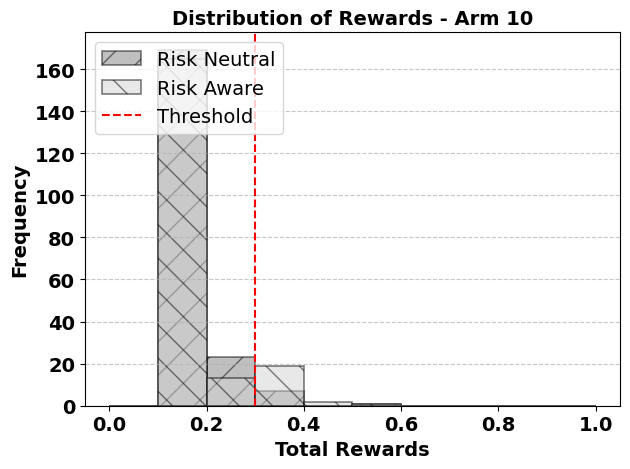

arm = 10
percentage above threshold (Neutral) = 5.0
percentage above threshold (Risk-Aware) = 6.5


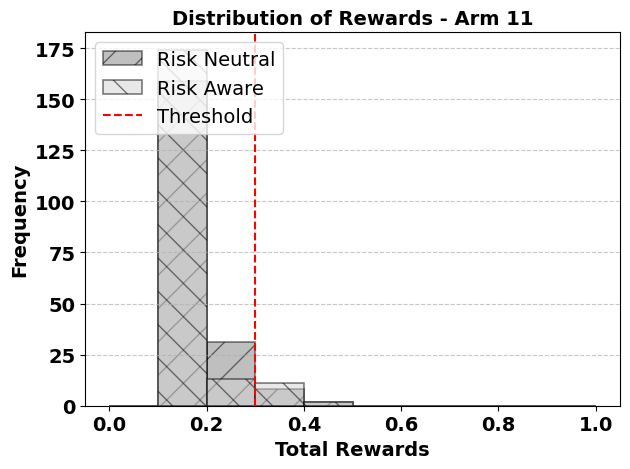

arm = 11
percentage above threshold (Neutral) = 8.0
percentage above threshold (Risk-Aware) = 15.0


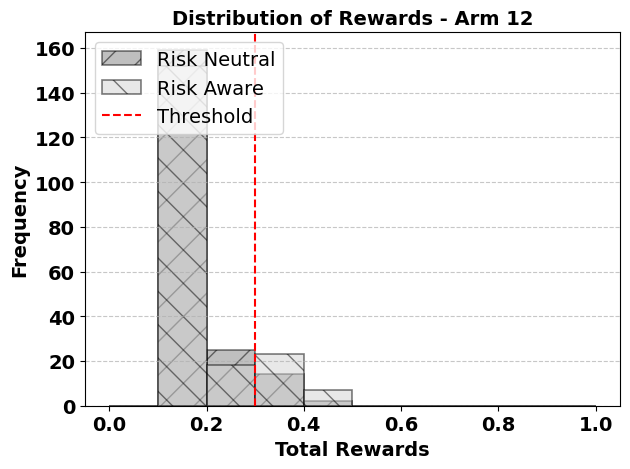

arm = 12
percentage above threshold (Neutral) = 11.5
percentage above threshold (Risk-Aware) = 19.0


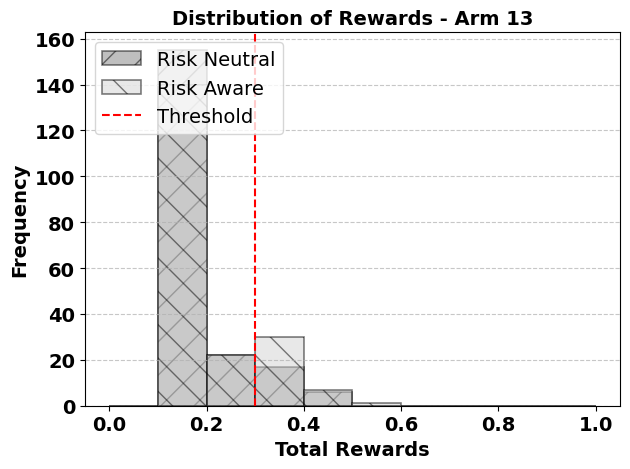

arm = 13
percentage above threshold (Neutral) = 9.0
percentage above threshold (Risk-Aware) = 22.5


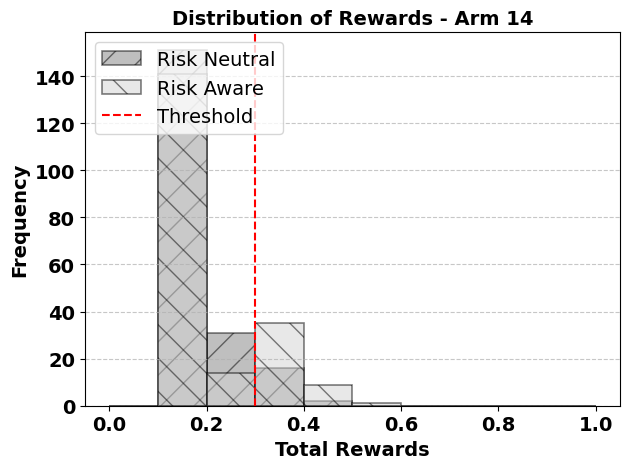

arm = 14
percentage above threshold (Neutral) = 10.0
percentage above threshold (Risk-Aware) = 77.0


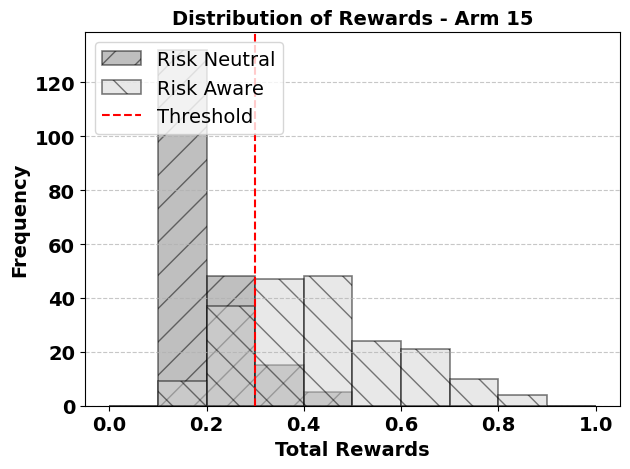

In [9]:
bins = np.linspace(0, 1, 11)

# Iterate over each arm and create histograms
for arm in range(n_arms):

    print('='*20)
    print(f"arm = {arm}")
    print(f"percentage above threshold (Neutral) = {100 * sum(totalrewards1[arm, :] >= th)/len(totalrewards1[arm, :])}")
    print(f"percentage above threshold (Risk-Aware) = {100 * sum(totalrewards2[arm, :] >= th)/len(totalrewards2[arm, :])}")

    plt.figure()

    # Histogram for the first file
    plt.hist(
        totalrewards1[arm, :], 
        bins=bins, 
        alpha=0.5, 
        label='Risk Neutral', 
        color='gray', 
        edgecolor='black', 
        linewidth=1.2, 
        hatch='/'  # Adding a hatch pattern for black-and-white distinction
    )

    # Histogram for the second file
    plt.hist(
        totalrewards2[arm, :], 
        bins=bins, 
        alpha=0.5, 
        label='Risk Aware', 
        color='lightgray', 
        edgecolor='black', 
        linewidth=1.2, 
        hatch='\\'  # Adding a different hatch pattern for black-and-white distinction
    )

    plt.axvline(x=th, color='red', linestyle='--', linewidth=1.5, label='Threshold')
    
    # Plot formatting
    plt.title(f'Distribution of Rewards - Arm {arm+1}', fontsize=14, fontweight='bold')
    plt.xlabel('Total Rewards', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.legend(loc='upper left', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()



In [10]:
import joblib
import numpy as np
import matplotlib.pyplot as plt

df = 0.9
nt = 5
ns = 4
nc = 3
ng = 50
n_arms = ns*nc
ut = (1, 0)
th = 0.7
fr = 0.1

file1 = f'/Users/nima/Desktop/Others/PostDoc/RiskAware_Journal/Updated/FINAL-FINAL/planning-nsfinite-June25/df{df}_nt{nt}_ns{ns}_ng{ng}_nc{nc}_ut{ut}_th{th}_fr{fr}_Neutral.joblib'
file2 = f'/Users/nima/Desktop/Others/PostDoc/RiskAware_Journal/Updated/FINAL-FINAL/planning-nsfinite-June25/df{df}_nt{nt}_ns{ns}_ng{ng}_nc{nc}_ut{ut}_th{th}_fr{fr}_RiskAware.joblib'

# Load data from joblib files
data1 = joblib.load(file1)
data2 = joblib.load(file2)

# Extract `totalrewards` from the loaded data
totalrewards1 = data1[0]
totalrewards2 = data2[0]


arm = 0
percentage above threshold (Neutral) = 4.0
percentage above threshold (Risk-Aware) = 100.0


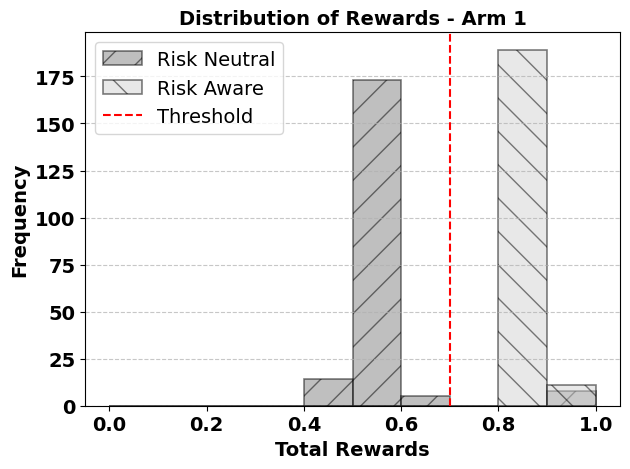

arm = 1
percentage above threshold (Neutral) = 17.5
percentage above threshold (Risk-Aware) = 0.0


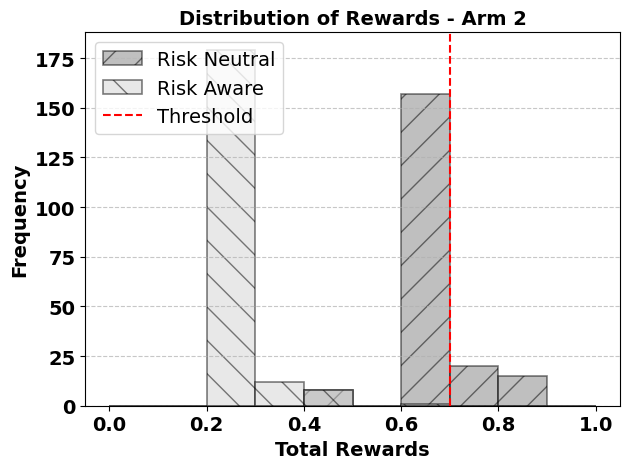

arm = 2
percentage above threshold (Neutral) = 0.0
percentage above threshold (Risk-Aware) = 1.0


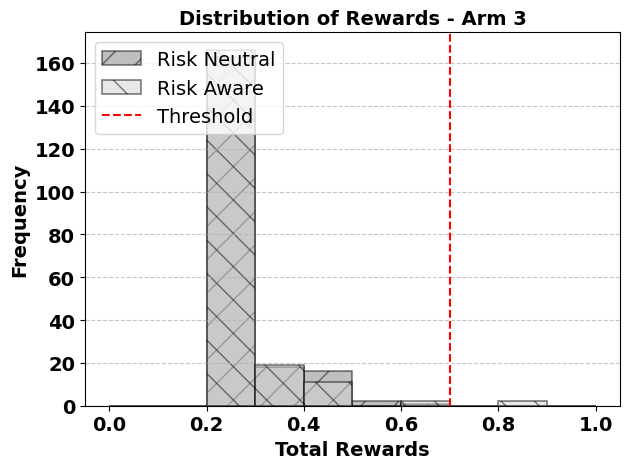

arm = 3
percentage above threshold (Neutral) = 0.5
percentage above threshold (Risk-Aware) = 2.0


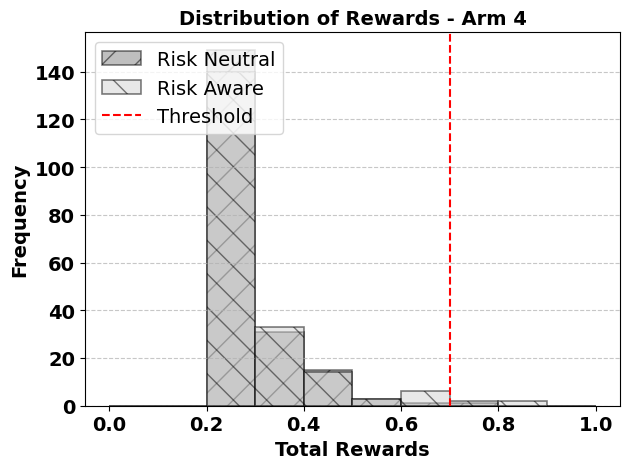

arm = 4
percentage above threshold (Neutral) = 1.5
percentage above threshold (Risk-Aware) = 2.5


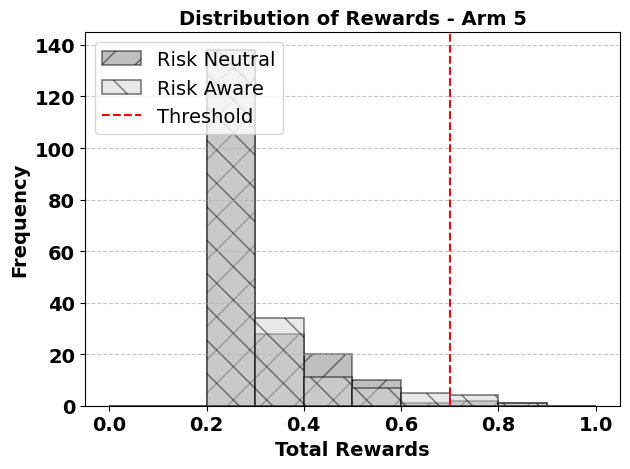

arm = 5
percentage above threshold (Neutral) = 1.5
percentage above threshold (Risk-Aware) = 3.5


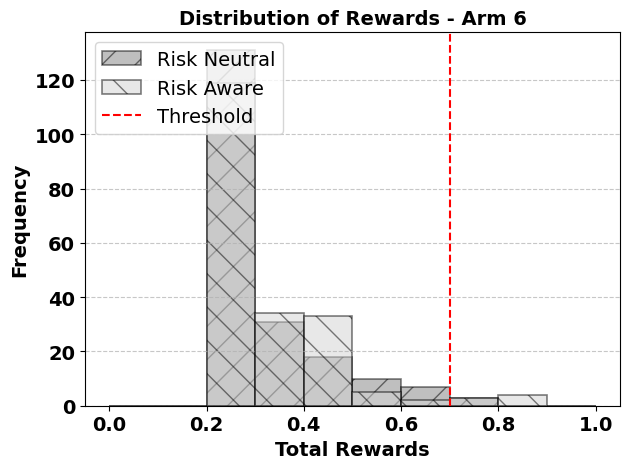

arm = 6
percentage above threshold (Neutral) = 1.5
percentage above threshold (Risk-Aware) = 3.0


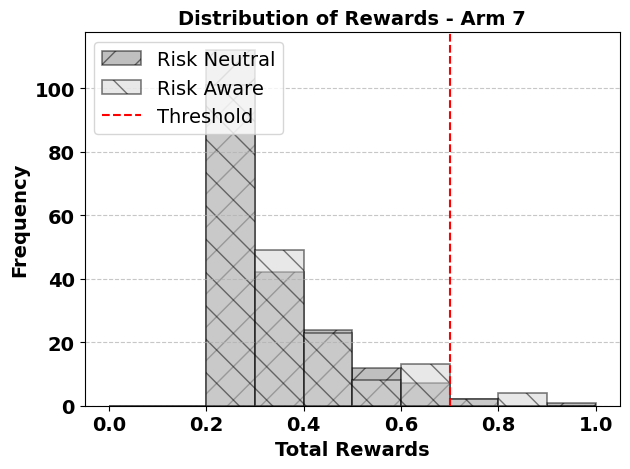

arm = 7
percentage above threshold (Neutral) = 2.0
percentage above threshold (Risk-Aware) = 8.5


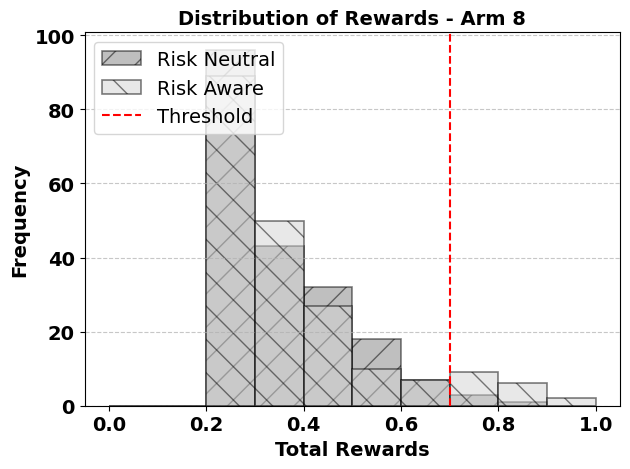

arm = 8
percentage above threshold (Neutral) = 4.5
percentage above threshold (Risk-Aware) = 9.0


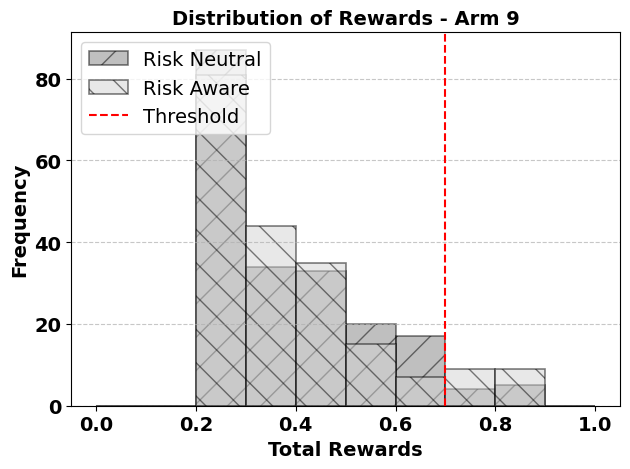

arm = 9
percentage above threshold (Neutral) = 8.0
percentage above threshold (Risk-Aware) = 11.0


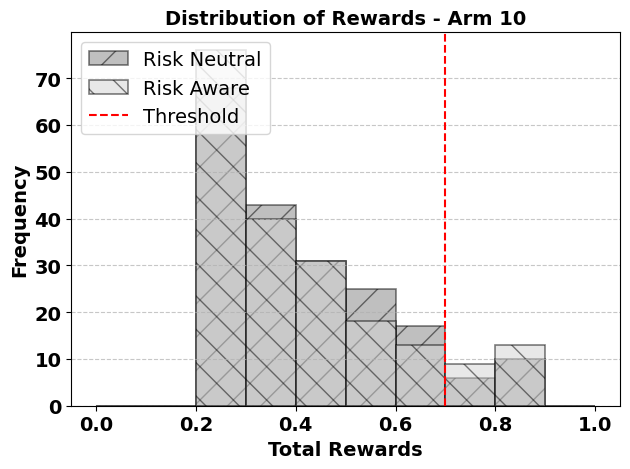

arm = 10
percentage above threshold (Neutral) = 8.0
percentage above threshold (Risk-Aware) = 12.0


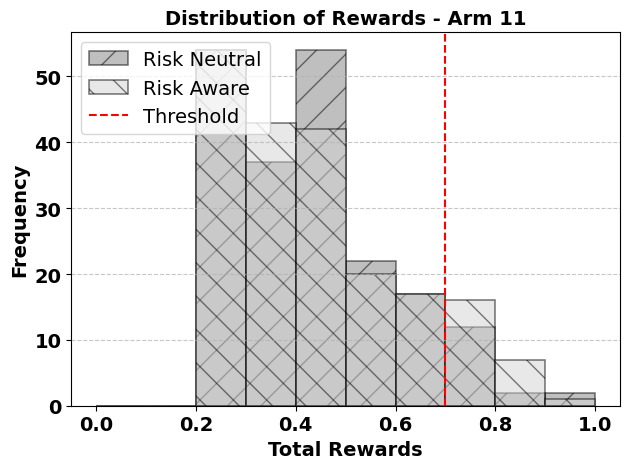

arm = 11
percentage above threshold (Neutral) = 11.5
percentage above threshold (Risk-Aware) = 18.5


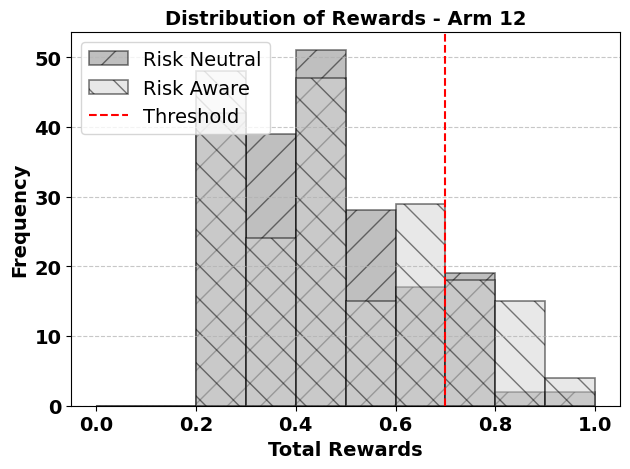

In [11]:
bins = np.linspace(0, 1, 11)

# Iterate over each arm and create histograms
for arm in range(n_arms):

    print('='*20)
    print(f"arm = {arm}")
    print(f"percentage above threshold (Neutral) = {100 * sum(totalrewards1[arm, :] >= th)/len(totalrewards1[arm, :])}")
    print(f"percentage above threshold (Risk-Aware) = {100 * sum(totalrewards2[arm, :] >= th)/len(totalrewards2[arm, :])}")

    plt.figure()

    # Histogram for the first file
    plt.hist(
        totalrewards1[arm, :], 
        bins=bins, 
        alpha=0.5, 
        label='Risk Neutral', 
        color='gray', 
        edgecolor='black', 
        linewidth=1.2, 
        hatch='/'  # Adding a hatch pattern for black-and-white distinction
    )

    # Histogram for the second file
    plt.hist(
        totalrewards2[arm, :], 
        bins=bins, 
        alpha=0.5, 
        label='Risk Aware', 
        color='lightgray', 
        edgecolor='black', 
        linewidth=1.2, 
        hatch='\\'  # Adding a different hatch pattern for black-and-white distinction
    )

    plt.axvline(x=th, color='red', linestyle='--', linewidth=1.5, label='Threshold')
    
    # Plot formatting
    plt.title(f'Distribution of Rewards - Arm {arm+1}', fontsize=14, fontweight='bold')
    plt.xlabel('Total Rewards', fontsize=14, fontweight='bold')
    plt.ylabel('Frequency', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=14, fontweight='bold')
    plt.yticks(fontsize=14, fontweight='bold')
    plt.legend(loc='upper left', fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show the plot
    plt.show()

